In [62]:
import numpy as np
import pandas as pd
from google.colab import drive

In [63]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
movies = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv', low_memory=False)

In [65]:
movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [66]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [67]:
movies = movies[:5000]

In [68]:
movies = movies.dropna(subset=['overview', 'genres', 'vote_average', 'popularity', 'revenue'])

---
## TfidfVectorizer (Алгоритм) + Cosine Similarity (Метрика)



1. TfidfVectorizer (Алгоритм) + Cosine Similarity (Метрика)

**TfidfVectorizer**:

    Что это? Это алгоритм для преобразования текста в числовые векторы, который учитывает частоту слов, а также их важность в контексте всей коллекции документов (фильмов).

    Как работает? Алгоритм преобразует каждое описание фильма в вектор, где каждый элемент вектора — это вес (важность) конкретного слова в описании. Вес слова определяется на основе того, как часто оно встречается в конкретном описании и как редко оно встречается в других описаниях.

Пример:

Предположим, у нас есть два фильма:

    Фильм 1: "Action packed adventure with superheroes"

    Фильм 2: "Superheroes fight in an action movie"

Оба фильма содержат слова "action" и "superheroes". Векторы, полученные с помощью TfidfVectorizer, будут отражать важность этих слов в контексте описаний фильмов.

**Cosine Similarity**:

    Что это? Cosine Similarity — это метрика для измерения схожести между двумя векторами. Она измеряет угол между векторами и выражается числом от 0 до 1. Чем меньше угол между векторами, тем более похожи объекты.

    Как работает? Если два фильма имеют одинаковое описание или схожее описание, то угол между их векторами будет маленьким, а Cosine Similarity будет близким к 1.

Пример:

Если Cosine Similarity между векторами двух фильмов 0.9, это означает, что их описания очень похожи.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_movies(index, cosine_sim_matrix, n=10):
    sim_scores = list(enumerate(cosine_sim_matrix[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    print(sim_scores)
    movie_indices = [i[0] for i in sim_scores]
    return movies.iloc[movie_indices][['title', 'overview']]

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['overview'])

cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Рекомендации по Tfidf Cosine Similarity:")
print(get_similar_movies(0, cosine_sim_tfidf))

Рекомендации по Tfidf Cosine Similarity:
[(2979, np.float64(0.4493581746876607)), (1058, np.float64(0.17075242813904823)), (3039, np.float64(0.15128155188396905)), (483, np.float64(0.14788996558083908)), (1916, np.float64(0.13613759049791974)), (446, np.float64(0.12618573061064553)), (1019, np.float64(0.1081381335956564)), (2140, np.float64(0.10758736044491302)), (3234, np.float64(0.1049902559851536)), (4060, np.float64(0.10450805489090641))]
                      title                                           overview
2997            Toy Story 2  Andy heads off to Cowboy Camp, leaving his toy...
1071  Rebel Without a Cause  After moving to a new town, troublemaking teen...
3057        Man on the Moon  A film about the life and career of the eccent...
485                  Malice  A tale about a happily married couple who woul...
1932              Condorman  Comic artist and writer Woody performs a simpl...
448       For Love or Money  New York concierge Doug Ireland wants to go in...


---
## CountVectorizer (Алгоритм) + Cosine Similarity (Метрика)

2. CountVectorizer (Алгоритм) + Cosine Similarity (Метрика)

**CountVectorizer**:

Что это?

CountVectorizer — это алгоритм, который превращает текст в векторы, просто считая количество вхождений каждого слова в описание фильма. В отличие от TfidfVectorizer, он не учитывает частоту слов в других фильмах.

Как работает?

Например, если слово "action" появляется 3 раза в одном описании и 5 раз в другом, векторы будут содержать эти числа.

Пример:

    Фильм 1: "Action movie with a lot of action"

    Фильм 2: "Action packed adventure movie"

С помощью CountVectorizer создадутся два вектора, которые будут представлять, сколько раз встречаются слова "action", "movie" и т. д.

**Cosine Similarity**:

Что это?

Так как мы уже рассмотрели Cosine Similarity выше, это метрика, которая также используется для оценки сходства между векторами, полученными с помощью CountVectorizer.

Пример:

Если два фильма содержат схожие слова с похожими частотами, то Cosine Similarity будет высоким.

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_movies(index, cosine_sim_matrix, n=10):
    sim_scores = list(enumerate(cosine_sim_matrix[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    print(sim_scores)
    movie_indices = [i[0] for i in sim_scores]
    return movies.iloc[movie_indices][['title', 'overview']]

count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(movies['overview'])

cosine_sim_count = cosine_similarity(count_matrix, count_matrix)

print("\nРекомендации по CountVectorizer Cosine Similarity:")
print(get_similar_movies(0, cosine_sim_count))


Рекомендации по CountVectorizer Cosine Similarity:
[(2979, np.float64(0.4123930494211613)), (3039, np.float64(0.14285714285714285)), (483, np.float64(0.13109470506889243)), (1916, np.float64(0.12777531299998798)), (1058, np.float64(0.1270001270001905)), (446, np.float64(0.1188643277625491)), (589, np.float64(0.10631548679075012)), (1019, np.float64(0.10394383930128555)), (2140, np.float64(0.09583148474999098)), (4060, np.float64(0.09352195295828244))]
                      title                                           overview
2997            Toy Story 2  Andy heads off to Cowboy Camp, leaving his toy...
3057        Man on the Moon  A film about the life and career of the eccent...
485                  Malice  A tale about a happily married couple who woul...
1932              Condorman  Comic artist and writer Woody performs a simpl...
1071  Rebel Without a Cause  After moving to a new town, troublemaking teen...
448       For Love or Money  New York concierge Doug Ireland wants to

---
## Jaccard Similarity (Метрика)

3. Jaccard Similarity (Метрика)

Что это?

Jaccard Similarity — это метрика, которая измеряет схожесть между двумя множествами, рассчитывая отношение размера пересечения множеств к размеру их объединения.
Как работает?

Для жанров фильмов мы можем рассматривать жанры как множества, например:

    Фильм 1: ['Action', 'Adventure']

    Фильм 2: ['Action', 'Sci-Fi']

Пересечение жанров: ['Action'], объединение жанров: ['Action', 'Adventure', 'Sci-Fi'].

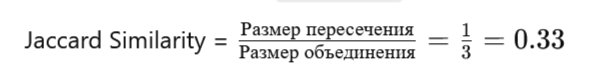

Пример:

Если два фильма имеют схожие жанры, их Jaccard Similarity будет выше. Например, если два фильма имеют один и тот же жанр, схожесть будет 1 (максимальная).

In [71]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import pairwise_distances

def jaccard_similarity(matrix):
    return 1 - pairwise_distances(matrix, metric='jaccard')

jaccard_sim = jaccard_similarity(genres_bin)

mlb = MultiLabelBinarizer()
genres_bin = mlb.fit_transform(movies['genres'].str.split('|'))

print("\nJaccard Similarity между фильмами:")
print(jaccard_sim[:20, :20])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)



Jaccard Similarity между фильмами:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.

---
## Euclidean Distance (Метрика)

4. Euclidean Distance (Метрика)

Что это?

Euclidean Distance — это стандартная метрика, измеряющая прямое расстояние между двумя точками в пространстве. В контексте фильмов, точки — это векторы признаков фильмов.
Как работает?

Предположим, у нас есть два фильма с такими признаками, как рейтинг, количество голосов, и доход. Для двух фильмов их векторы могут быть:

    Фильм 1: [7.5, 1200, 1000000]

    Фильм 2: [8.0, 1300, 1500000]

Euclidean Distance между этими точками будет рассчитываться как:

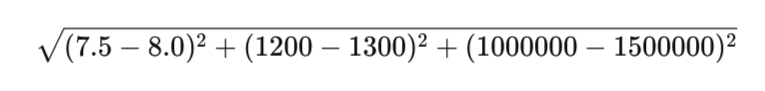

Пример:

Если два фильма имеют схожие числовые значения для этих признаков, то Euclidean Distance будет маленьким, и это будет означать, что фильмы схожи.

In [72]:
from scipy.spatial.distance import euclidean

euclidean_sim = pairwise_distances(genres_bin, metric='euclidean')

print("\nEuclidean Distance между фильмами:")
print(euclidean_sim[:5, :5])


Euclidean Distance между фильмами:
[[0.         1.41421356 1.41421356 1.41421356 1.41421356]
 [1.41421356 0.         1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 0.         1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 0.         1.41421356]
 [1.41421356 1.41421356 1.41421356 1.41421356 0.        ]]


---
## Pearson Correlation (Метрика)

5. Pearson Correlation (Метрика)

Что это?

Pearson Correlation — это метрика, измеряющая линейную зависимость между двумя переменными. Значение коэффициента корреляции может быть от -1 до 1, где 1 — полная положительная корреляция, -1 — полная отрицательная корреляция, а 0 — отсутствие корреляции.

Как работает?

Если два фильма имеют похожие оценки по меткам (например, рейтинг, количество голосов), то их корреляция будет высокой.

Пример:

Если фильмы с высоким рейтингом также имеют высокий доход, то Pearson Correlation между их рейтингами и доходами будет близким к 1.

In [73]:
from scipy.stats import pearsonr

def pearson_correlation(matrix):
    corr = np.corrcoef(matrix.T)
    return corr

movies['vote_average'] = pd.to_numeric(movies['vote_average'], errors='coerce')
movies['vote_count'] = pd.to_numeric(movies['vote_count'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')

quantitative_features = movies[['vote_average', 'vote_count', 'popularity', 'revenue']].values
pearson_corr = pearson_correlation(quantitative_features)

print("\nPearson Correlation между фильмами:")
print(pearson_corr[:10, :10])


Pearson Correlation между фильмами:
[[1.         0.24425402 0.31584589 0.14361411]
 [0.24425402 1.         0.65583849 0.71286252]
 [0.31584589 0.65583849 1.         0.4698977 ]
 [0.14361411 0.71286252 0.4698977  1.        ]]


---
## Manhattan Distance (Метрика)

6. Manhattan Distance (Метрика)

Что это?

Manhattan Distance измеряет расстояние между двумя точками, используя сумму абсолютных разностей их признаков.
Как работает?

Если два фильма имеют следующие числовые признаки:

    Фильм 1: [7.5, 1200, 1000000]
    Фильм 2: [8.0, 1300, 1500000]

Манхэттенское расстояние будет равно:

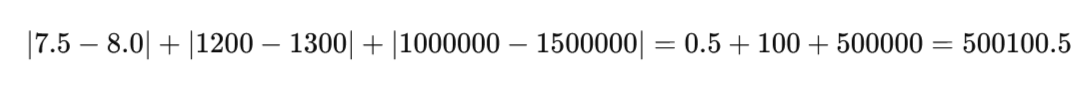

Пример:

Если два фильма очень различаются по значению признаков (например, рейтинг и доход), Manhattan Distance будет высоким, что укажет на большую разницу.

In [74]:
from sklearn.metrics import pairwise_distances

manhattan_sim = pairwise_distances(quantitative_features, metric='cityblock')

print("\nManhattan Distance между фильмами:")
print(manhattan_sim[:4, :4])


Manhattan Distance между фильмами:
[[0.00000000e+00 1.10759792e+08 3.73559367e+08 2.92107278e+08]
 [1.10759792e+08 0.00000000e+00 2.62799576e+08 1.81347486e+08]
 [3.73559367e+08 2.62799576e+08 0.00000000e+00 8.14522223e+07]
 [2.92107278e+08 1.81347486e+08 8.14522223e+07 0.00000000e+00]]


---
## Когда и зачем применять эти методы?

**TfidfVectorizer** и **Cosine Similarity**: Используются, когда нужно сравнивать фильмы по их описаниям. Это помогает рекомендательным системам предложить фильмы с похожим содержанием.

**CountVectorizer** и **Cosine Similarity**: Подходит для текстов, где важно просто количество вхождений слов, без учёта их важности в контексте.

**Jaccard Similarity**: Используется для категориальных данных, таких как жанры, где важно наличие или отсутствие определённых характеристик.

**Euclidean Distance**: Хорошо работает с количественными признаками (например, рейтинг, количество голосов) и позволяет измерять «физическое» расстояние между фильмами.

**Pearson Correlation**: Подходит для поиска взаимосвязи между переменными, например, между рейтингом и количеством голосов, доходом и популярностью.

**Manhattan Distance**: Также используется для количественных признаков и даёт представление о разнице между объектами по множеству признаков.